In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load data from a csv  file

a csv file contains comma-separated values (CSV) <br>
https://en.wikipedia.org/wiki/Comma-separated_values

In [2]:
df = pd.read_csv('patient_record.csv', sep=',')
df

,Age,Gender,Tumor_size_mm
0,30,M,1.0
1,40,F,2.0
2,85,F,0.1
3,75,M,1.0
4,95,F,3.0


In [3]:
df.shape

(5, 3)

In [4]:
df.columns # column indexes

Index(['Age', 'Gender', 'Tumor_size_mm'], dtype='object')

In [5]:
df.index  # row indexes

RangeIndex(start=0, stop=5, step=1)

In [6]:
df.iloc[0,:] # the first row, data type is Series

Age               30
Gender             M
Tumor_size_mm    1.0
Name: 0, dtype: object

In [7]:
type(df.iloc[0,:])

pandas.core.series.Series

In [8]:
df.iloc[0:1,:] # the first row, data type is dataframe

,Age,Gender,Tumor_size_mm
0,30,M,1.0


In [9]:
type(df.iloc[0:1,:])

pandas.core.frame.DataFrame

get a row (a series) using `loc[n]`

In [10]:
df.loc[0] # the first row

Age               30
Gender             M
Tumor_size_mm    1.0
Name: 0, dtype: object

In [11]:
df['Age']

0    30
1    40
2    85
3    75
4    95
Name: Age, dtype: int64

In [12]:
df.Age

0    30
1    40
2    85
3    75
4    95
Name: Age, dtype: int64

### add new columns to the dataframe

In [13]:
df['smoking'] = [0, 1, 7, 1, 0]
#0: never smoke cigarettes
#1: 1 day per week
#7: everyday (7 days per week)
df

,Age,Gender,Tumor_size_mm,smoking
0,30,M,1.0,0
1,40,F,2.0,1
2,85,F,0.1,7
3,75,M,1.0,1
4,95,F,3.0,0


In [14]:
df['height'] = [1.6, 1.7, 1.8, 1.5, 1.9] # unit: meter
df['weight'] = [60, 70, 80, 50, 90] # unit:kg
df

,Age,Gender,Tumor_size_mm,smoking,height,weight
0,30,M,1.0,0,1.6,60
1,40,F,2.0,1,1.7,70
2,85,F,0.1,7,1.8,80
3,75,M,1.0,1,1.5,50
4,95,F,3.0,0,1.9,90


### add a new patient record (i.e., a row) to the dataframe

In [15]:
df.loc[5]=[100, 'F', 0.5, 0, 1.6, 70]
df

,Age,Gender,Tumor_size_mm,smoking,height,weight
0,30,M,1.0,0,1.6,60
1,40,F,2.0,1,1.7,70
2,85,F,0.1,7,1.8,80
3,75,M,1.0,1,1.5,50
4,95,F,3.0,0,1.9,90
5,100,F,0.5,0,1.6,70


In [16]:
# BMI (Body mass index) = weight /(height*height)
df['BMI'] = df['weight']/df['height']**2
df

,Age,Gender,Tumor_size_mm,smoking,height,weight,BMI
0,30,M,1.0,0,1.6,60,23.437500
1,40,F,2.0,1,1.7,70,24.221453
2,85,F,0.1,7,1.8,80,24.691358
3,75,M,1.0,1,1.5,50,22.222222
4,95,F,3.0,0,1.9,90,24.930748
5,100,F,0.5,0,1.6,70,27.343750


In [17]:
df_age_bmi=df[['Age', 'BMI']] # select two columns to make a new dataframe
df_age_bmi

,Age,BMI
0,30,23.437500
1,40,24.221453
2,85,24.691358
3,75,22.222222
4,95,24.930748
5,100,27.343750


convert the two columns 'Age' & 'BMI' to a Numpy array

In [18]:
df[['Age', 'BMI']].values

array([[ 30.        ,  23.4375    ],
       [ 40.        ,  24.22145329],
       [ 85.        ,  24.69135802],
       [ 75.        ,  22.22222222],
       [ 95.        ,  24.93074792],
       [100.        ,  27.34375   ]])

### plot Age vs BMI 

Text(0, 0.5, 'BMI')

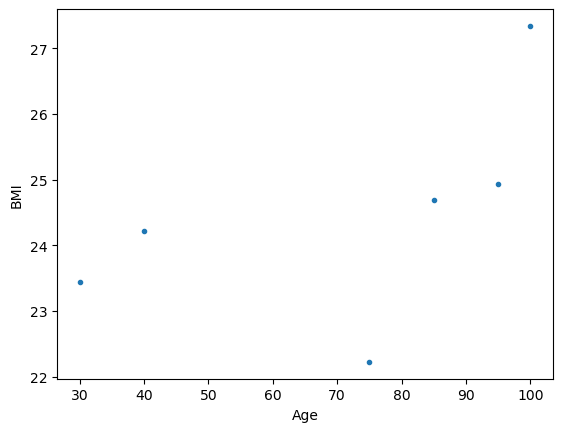

In [19]:
#do some machine learning modeling using the two columns
#to find the relationship between Age and BMI
#here, we simply plot them
fig, ax = plt.subplots()
ax.plot(df['Age'].values, df['BMI'].values, '.')
ax.set_xlabel('Age')
ax.set_ylabel('BMI')

### Save the dataframe to a csv file

In [20]:
#save the Dataframe df to a csv file
#set index=False, so the row indexes will not be saved  
df.to_csv('patient_record_new.csv', index=False, sep=',')